In [1]:
import pandas as pd
from os import walk
import matplotlib.pyplot as plt
from CritRole.Common import EDamageTypes
from CritRole.Common import validOrZero

globalData = {}
accmData = []

gindex = 0

def process_file(root, x, character):
    global gindex
    fileindex = x.split('.')[0].zfill(3)
#    if not x == "64.html.csv":# and not x == "44.html.csv" and not x == "33.html.csv":
#       return
    #print("Processing file: " + str(x))
    eviFrame = pd.read_csv(root + x, index_col=0);
    #print(eviFrame["PhysicalInstVals"][0:20])
    #eviFrame = eviFrame.loc[:, EDamageTypes[0]:EDamageTypes[len(EDamageTypes) - 1]+"Instances"]
    eviFrame = eviFrame.loc[:, EDamageTypes[0]:EDamageTypes[len(EDamageTypes) - 1]]
    eviFrame = eviFrame.iloc[[(character)]]
    #eviFrame = eviFrame.rename(index={1: gindex})
    eviFrame.index.name = "Episode"
    last = eviFrame.index[-1]
    eviFrame = eviFrame.rename(index={last: str(fileindex)})
    gindex += 1
    # + eviFrame[2:8]
    #eviFrame = eviFrame.drop(['Trinket'])
    #print(eviFrame)
    
    #print(character)
    if len(accmData) > character:
        #accmData[0].append(eviFrame, ignore_index=True);
        accmData[character] = pd.concat([accmData[character], eviFrame]);
        #print(gindex)
        #print(accmData[0])
    else:
        accmData.append(eviFrame);
        #print(accmData[0])
        

    #print(eviFrame)
    #print(accmData)
#    print(eviFrame.shape[0])
    for i in range(0, len(EDamageTypes)):
        #print(eviFrame.columns[i]);
        dAgg = eviFrame[eviFrame.columns[i]];

        if EDamageTypes[i] in globalData:
            globalData[EDamageTypes[i]][0] += dAgg
        else:
            globalData[EDamageTypes[i]] = []
            globalData[EDamageTypes[i]].append(dAgg)
#        DamageAgg = eviFrame[''
        
# Enumerate the folder
damageTakens = []
rootDirectory = "./ParsedDamageTaken/"
for (dirpath, dirnames, filenames) in walk(rootDirectory):
    damageTakens.extend(filenames)


for chars in range(0,7):
    for singleFile in damageTakens:
        process_file(rootDirectory, singleFile, chars)
        
    accmData[chars] = accmData[chars].sort_index()
    print("======= CHAR " + str(chars) + " ========")
    print(accmData[chars])
        
print("Done")


======= CHAR 0 ========
         Lightning  Poison  Fire  Falling  Radiant  Necrotic  Psychic  Ice  \
Episode                                                                      
001              0       0     0        0        0         0        0    0   
002              0       0     0        0        0         0        0    0   
003              0       0     0        0        0         0        0    0   
004              0       0     0        8        0         0        0    0   
005              0       0     0       36        0         0        0    0   
006              0       0     0        0        0         0        0    0   
007             36       7    12        0        0         0        0    0   
008              0       0     0        0        0         0        0    0   
009              0       0     0        0        0         0       22    0   
010              0       0    14        0        0         0        0    0   
011              0       0     0        

======= CHAR 2 ========
         Lightning  Poison  Fire  Falling  Radiant  Necrotic  Psychic  Ice  \
Episode                                                                      
001              0       0     0        0        0         0        0    0   
002             14       0     0        0        0         0        0    0   
003              0       0     0        0        0         0        0    0   
004              0       0     0        0        0         0        0    0   
005              0       0     0       18        0         0        0    0   
006              0       0     0        0        0         0        0    0   
007              9       0    45        0        0         0       17    0   
008              0       0     0        0        0         0        0    0   
009              0       0     0        0        0         0        0    0   
010              0       0     0        9        0         0        0    0   
011              0       0     0        

======= CHAR 4 ========
         Lightning  Poison  Fire  Falling  Radiant  Necrotic  Psychic  Ice  \
Episode                                                                      
001              0      31     0        0        0         0        0    0   
002              0       0     0        0        0         0        0    0   
003              0       0     0        0        0         0        0    0   
004              0       0     0        0        0         0        0    0   
005              0       0     0       36        0         0        0    0   
006              0       0     0        0        0         0        0    0   
007              0       0    30        0        0         0        0    0   
008              0       0     0        0        0         0        0    0   
009              0       0     0        0        0         0        0    0   
010              0       0     0        0        0         0       11    0   
011              0       0     0        

======= CHAR 6 ========
         Lightning  Poison  Fire  Falling  Radiant  Necrotic  Psychic  Ice  \
Episode                                                                      
001              0       0     0        0        0         0        0    0   
002              0       0     0        0        0         0        0    0   
003              0       0     0        0        0         0        0    0   
004              0       0     0        0        0         0        0    0   
005              0       0     0       36        0         0        0    0   
006              0       0     0        0        0         0        0    0   
007             36      11    17        0        0         0        0    0   
008              0       0     0        0        0         0        0    0   
009              0       0     0        0        0         0        0    0   
010              0       0     0        0        0         0        0    0   
011              0       0     0        

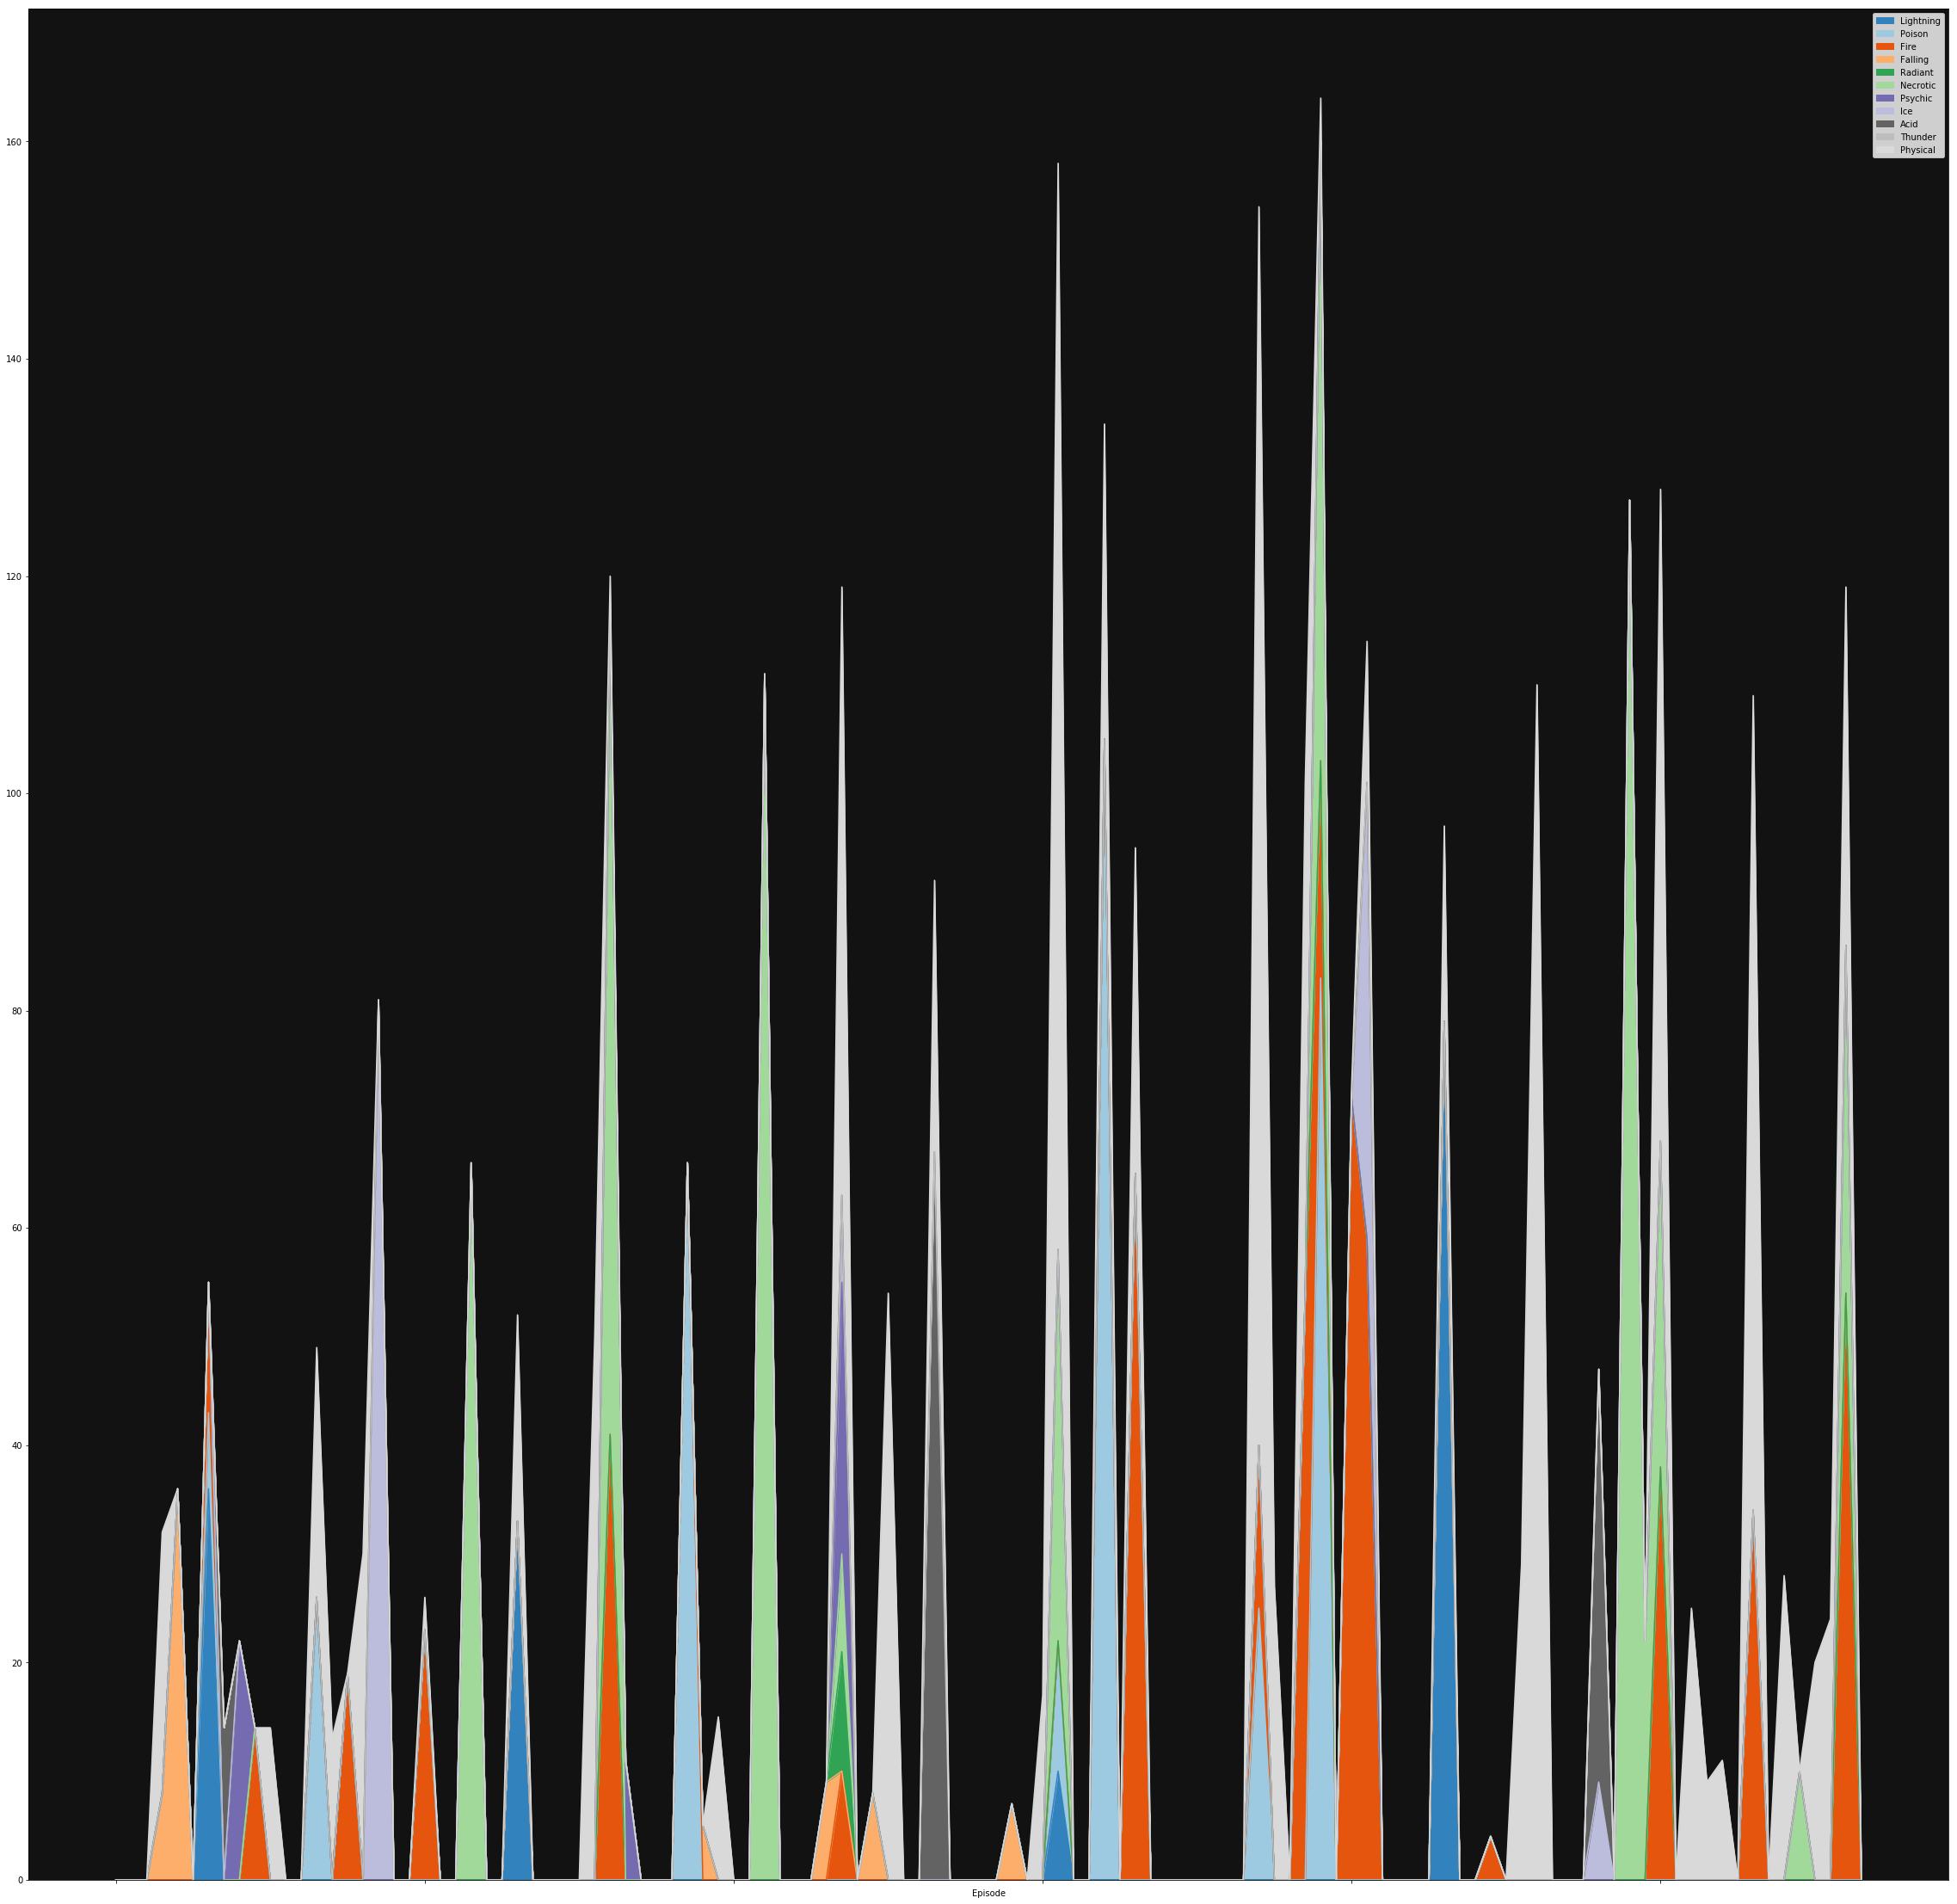

In [9]:
gplt = accmData[0].plot.area(stacked=True, figsize=(40,40), colormap="tab20c")
gplt.set_facecolor('#121212')


In [3]:
#plt.figure(num=1, figsize=(80, 60), dpi=80, facecolor='w', edgecolor='k')
plt.figure(figsize=(20,10))
accmData[4].cumsum().plot(figsize=(20,10))
plt.show()
#.area(stacked=True)

NameError: name 'plt' is not defined